# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Part 1 - Data Preprocessing

### Importing the dataset

In [2]:
dataset = pd.read_excel('IDataset1.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Charge_type        546 non-null    object 
 1   Charge_size        546 non-null    float64
 2   Standoff_distance  546 non-null    float64
 3   Impulse            546 non-null    float64
dtypes: float64(3), object(1)
memory usage: 17.2+ KB


In [3]:
# convert categorical variable into dummy variables
dataset = pd.get_dummies(dataset, columns=['Charge_type'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Charge_size        546 non-null    float64
 1   Standoff_distance  546 non-null    float64
 2   Impulse            546 non-null    float64
 3   Charge_type_CompB  546 non-null    uint8  
 4   Charge_type_TNT    546 non-null    uint8  
dtypes: float64(3), uint8(2)
memory usage: 14.0 KB


In [4]:
dataset.head()

,Charge_size,Standoff_distance,Impulse,Charge_type_CompB,Charge_type_TNT
0,0.5,1.5,58.168617,0,1
1,0.5,2.5,38.798874,0,1
2,0.5,3.5,28.473915,0,1
3,0.5,4.5,22.343452,0,1
4,0.5,5.5,18.326342,0,1


In [5]:
y = dataset['Impulse']
X = dataset.drop('Impulse', axis=1)
print(X.shape, y.shape)

(546, 4) (546,)


In [6]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

### Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)

In [8]:
print ("Train",len(X_train), len(y_train))
print ("Test",len(X_test), len(y_test))
print ("Val",len(X_val), len(y_val))

Train 382 382
Test 82 82
Val 82 82


## Part 2 - Building the ANN

### Initializing the ANN

In [14]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [15]:
ann.add(tf.keras.layers.Dense(units=200, input_shape=(X_train.shape[1],), activation='relu'))

### Adding the second hidden layer

In [16]:
ann.add(tf.keras.layers.Dense(units=125, activation='relu'))

### Adding the third hidden layer

In [17]:
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

### Adding the output layer

In [18]:
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

### what model looks like

In [19]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 200)               1000      
                                                                 
 dense_5 (Dense)             (None, 125)               25125     
                                                                 
 dense_6 (Dense)             (None, 50)                6300      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 32,476
Trainable params: 32,476
Non-trainable params: 0
_________________________________________________________________


## Part 3 - Training the ANN

### Compiling the ANN

In [20]:
from tensorflow.keras.optimizers import Nadam
opt = Nadam(learning_rate=0.001)
ann.compile(optimizer = opt, loss = 'mean_squared_error', metrics = ['mae'])

### early stopping callback

In [21]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

### Training the ANN model on the Training set

In [22]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=20,
                    verbose=1)

Epoch 1/500
20/20 [==============================] - 1s 12ms/step - loss: 18654.3594 - mae: 99.8560 - val_loss: 11803.6494 - val_mae: 71.9117
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 11025.4004 - mae: 70.7291 - val_loss: 6212.7920 - val_mae: 51.9454
Epoch 3/500
20/20 [==============================] - 0s 5ms/step - loss: 6816.2441 - mae: 56.3077 - val_loss: 3951.4089 - val_mae: 42.0971
Epoch 4/500
20/20 [==============================] - 0s 5ms/step - loss: 4638.1792 - mae: 47.7708 - val_loss: 2740.5322 - val_mae: 38.0392
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 3453.0215 - mae: 41.8445 - val_loss: 2839.8218 - val_mae: 37.9169
Epoch 6/500
20/20 [==============================] - 0s 5ms/step - loss: 2883.1538 - mae: 36.1547 - val_loss: 1610.8362 - val_mae: 27.5373
Epoch 7/500
20/20 [==============================] - 0s 5ms/step - loss: 2290.1912 - mae: 32.1258 - val_loss: 1436.6285 - val_mae: 27.5791
Epoch 8/500
20/20 [====

### Predicting the results of the Test set

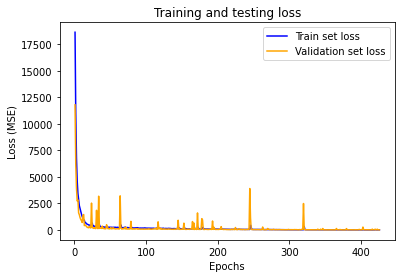

In [23]:
import matplotlib.pyplot as plt
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

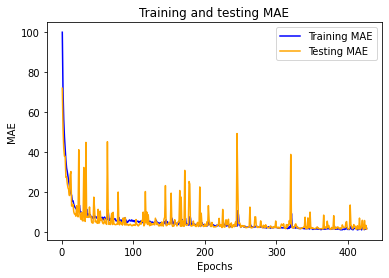

In [24]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Training MAE')
plt.plot(epochs, val_loss_values1, 'orange', label='Testing MAE')
plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [25]:
print (epochs)

range(1, 427)


3/3 [==============================] - 0s 1ms/step


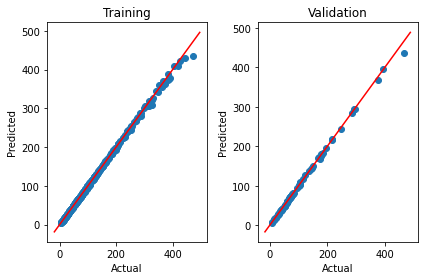

In [26]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=ann.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [27]:
#X_test=np.asarray(X_test).astype(np.int)

#y_test=np.asarray(y_test).astype(np.int)

y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

3/3 [==============================] - 0s 2ms/step
[[ 43.95  46.16]
 [108.88 106.79]
 [ 70.12  70.49]
 [ 38.29  38.93]
 [170.74 169.54]
 [ 79.24  78.32]
 [242.83 246.71]
 [ 65.99  66.54]
 [172.05 175.25]
 [117.49 116.92]
 [183.2  186.47]
 [ 49.24  54.09]
 [219.53 216.82]
 [ 68.14  68.81]
 [143.22 143.07]
 [ 77.1   77.36]
 [ 78.14  78.77]
 [294.01 296.19]
 [ 39.91  41.52]
 [ 69.37  68.5 ]
 [136.85 136.91]
 [435.56 465.29]
 [ 60.3   60.09]
 [ 26.28  27.95]
 [ 19.41  20.56]
 [ 75.58  75.35]
 [106.31 105.94]
 [181.91 183.23]
 [171.93 170.01]
 [ 29.78  31.03]
 [ 73.42  74.2 ]
 [175.8  178.35]
 [ 61.43  62.9 ]
 [283.51 284.67]
 [179.68 179.97]
 [ 70.73  72.03]
 [ 19.63  20.64]
 [293.55 293.22]
 [195.88 197.24]
 [145.18 146.06]
 [ 46.57  48.96]
 [ 61.23  59.69]
 [ 49.46  52.22]
 [ 82.94  82.95]
 [ 71.62  71.26]
 [ 73.23  73.68]
 [ 23.23  25.25]
 [ 36.94  38.42]
 [ 53.3   55.88]
 [  8.68  10.11]
 [ 42.58  42.82]
 [ 38.68  38.8 ]
 [ 70.86  70.49]
 [ 35.42  35.03]
 [ 40.79  41.68]
 [395.43 392.1

Text(0, 0.5, 'Predicted data')

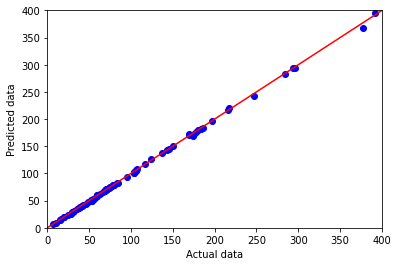

In [28]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([0,400],[0,400], color = "red")
plt.axis ([0,400,0,400])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

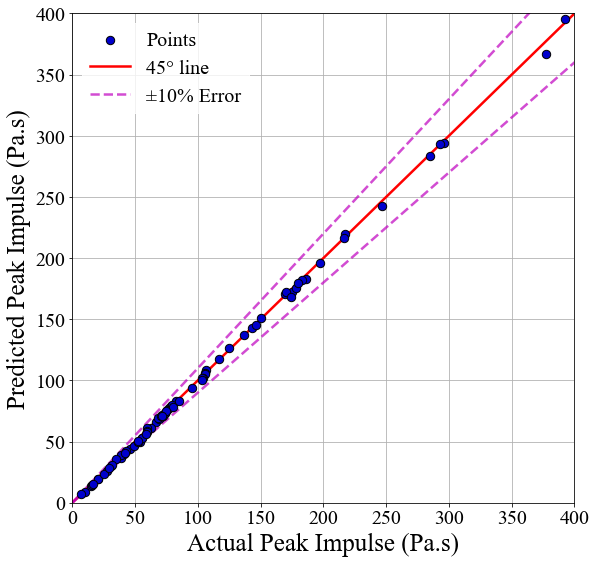

In [29]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test



# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Peak Impulse (Pa.s)',fontsize = 25, fontname='Times New Roman')
plt.xlabel('Actual Peak Impulse (Pa.s)',fontsize = 25, fontname='Times New Roman')
plt.xticks(fontsize = 20, fontname='Times New Roman')
plt.yticks(fontsize = 20, fontname='Times New Roman')


x1 = np.linspace(0,4000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
#plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
#plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 400)
plt.xlim(0, 400)
plt.legend(loc='upper left',prop = {'family' : 'Times New Roman', 'size': 20}, fancybox = False, edgecolor = 'white')

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax1.annotate("$R^2$ = {:.3f}".format(r2), (2500, 1000),fontsize = 25)  #Model is called here
#ax1.annotate("Adj.$R^2$ = {:.3f}".format(adj_r2), (2500, 750),fontsize = 25)

#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

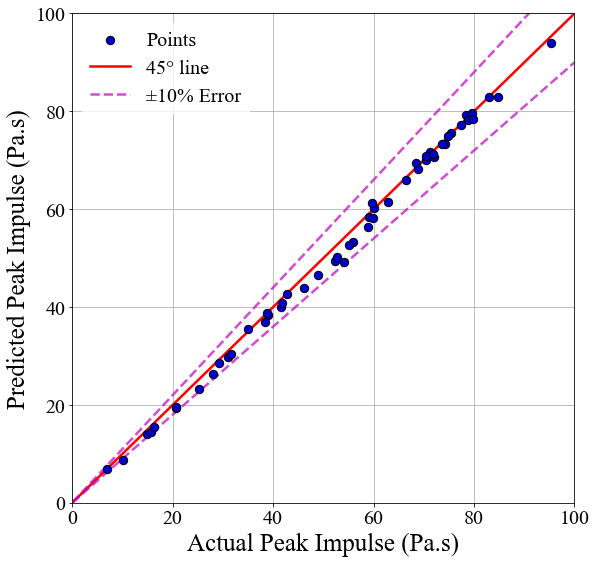

In [30]:
# Initialize layout
fig2, bx = plt.subplots(figsize = (9, 9))



# Add scatterplot
bx.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')




plt.ylabel('Predicted Peak Impulse (Pa.s)',fontsize = 25, fontname='Times New Roman')
plt.xlabel('Actual Peak Impulse (Pa.s)',fontsize = 25, fontname='Times New Roman')
plt.xticks(fontsize = 20, fontname='Times New Roman')
plt.yticks(fontsize = 20, fontname='Times New Roman')



x1 = np.linspace(0,500)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7) #\u00B1
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
#plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
#plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 100)
plt.xlim(0, 100)
plt.legend(loc='upper left',prop = {'family' : 'Times New Roman', 'size': 20}, fancybox = False, edgecolor = 'white')

plt.grid()

bx.spines['left'].set_color('black')        # setting up Y-axis tick color to red
bx.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red


#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

In [31]:
# metrics


trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

12/12 [==============================] - 0s 2ms/step
1.6531694228348845
1.807067696624216


In [32]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9981119466748006


In [33]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9988014784264201


In [34]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 98.78%
Within 20% margin 100.00%
Out of 20% margin 0.00%


In [31]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9996113207915419


In [32]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

1.7223792700934857

In [33]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

1.2256071393760386